/tmp/ipykernel_1310011/2105754813.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  risco_fogo_por_bioma = df.groupby(['Bioma', 'IntervaloPrecipitacao'])['RiscoFogo'].mean().reset_index()


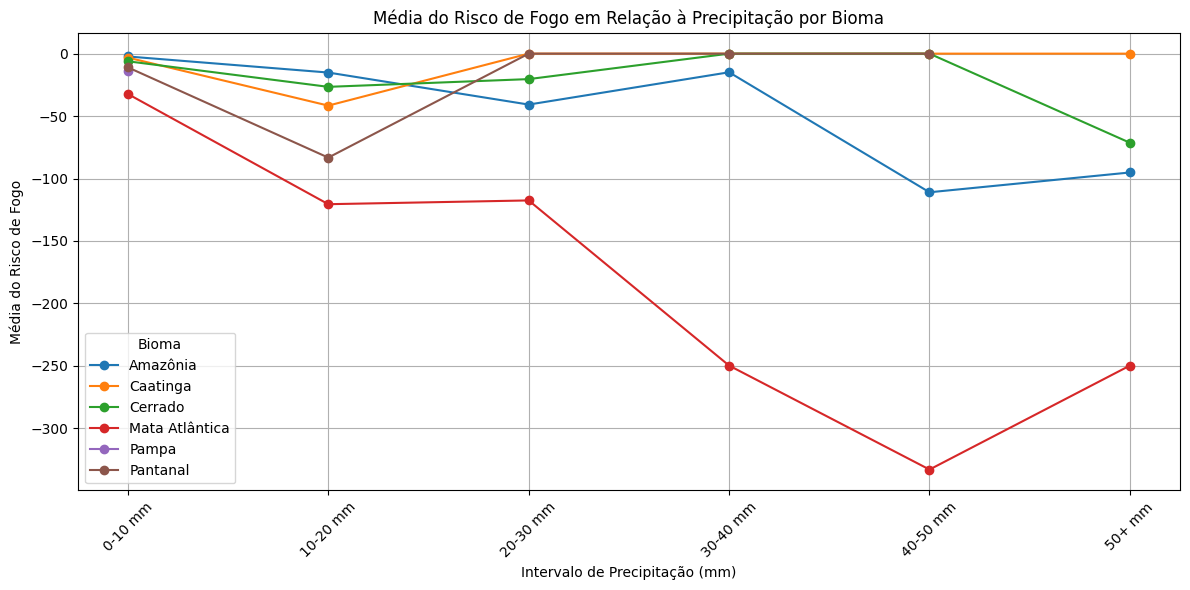

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from typing import Any, Tuple

PRECIPITATION_BINS = [0, 10, 20, 30, 40, 50, 100]
PRECIPITATION_LABELS = ['0-10 mm', '10-20 mm', '20-30 mm', '30-40 mm', '40-50 mm', '50+ mm']

def load_data(file_path: str) -> pd.DataFrame:
    df = pd.read_csv(file_path)
    df.columns = df.columns.str.strip()  
    df['DataHora'] = pd.to_datetime(df['DataHora'])  
    return df

def calculate_risk_by_precipitation_and_biome(df: pd.DataFrame) -> pd.DataFrame:
    df['IntervaloPrecipitacao'] = pd.cut(df['Precipitacao'], bins=PRECIPITATION_BINS, labels=PRECIPITATION_LABELS, right=False)
    risco_fogo_por_bioma = df.groupby(['Bioma', 'IntervaloPrecipitacao'])['RiscoFogo'].mean().reset_index()
    return risco_fogo_por_bioma

def plot_risk_by_precipitation_and_biome(risk_data: pd.DataFrame) -> None:
    plt.figure(figsize=(12, 6))
    for bioma in risk_data['Bioma'].unique():
        bioma_data = risk_data[risk_data['Bioma'] == bioma]
        plt.plot(bioma_data['IntervaloPrecipitacao'], bioma_data['RiscoFogo'], marker='o', label=bioma)
    plt.title('Média do Risco de Fogo em Relação à Precipitação por Bioma')
    plt.xlabel('Intervalo de Precipitação (mm)')
    plt.ylabel('Média do Risco de Fogo')
    plt.xticks(rotation=45)
    plt.legend(title='Bioma')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    file_path = 'data/focos_qmd_inpe_2024-01-01_2024-10-04_11.250079.csv'
    df = load_data(file_path)
    risk_data = calculate_risk_by_precipitation_and_biome(df)
    plot_risk_by_precipitation_and_biome(risk_data)


Somatório de Queimadas: 214856
Média de Queimadas por Mês: 21485.6
Desvio Padrão das Queimadas por Mês: 27944.68937454843


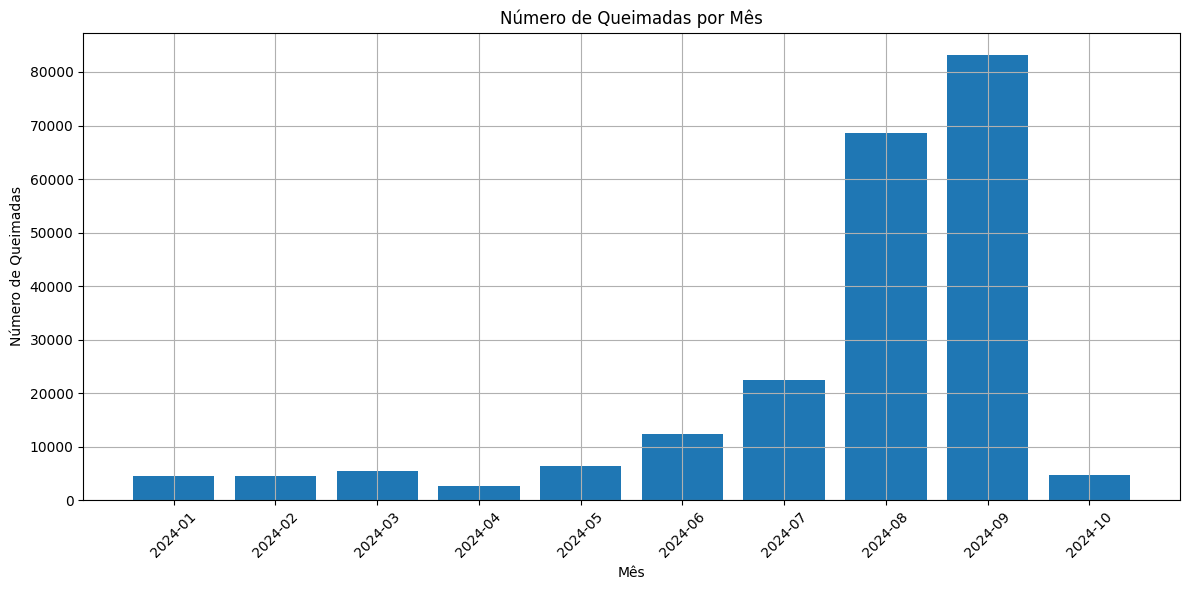

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def load_data(file_path):
    df = pd.read_csv(file_path)
    df.columns = df.columns.str.strip()
    df['DataHora'] = pd.to_datetime(df['DataHora'])
    return df

def count_burns_by_month(df):
    df['Mes'] = df['DataHora'].dt.to_period('M')
    return df.groupby('Mes').size()

def analyze_burns_with_numpy(burns_by_month):
    burns_array = burns_by_month.values
    soma_queimadas = np.sum(burns_array)
    media_queimadas = np.mean(burns_array)
    desvio_padrao_queimadas = np.std(burns_array)
    print(f"Somatório de Queimadas: {soma_queimadas}")
    print(f"Média de Queimadas por Mês: {media_queimadas}")
    print(f"Desvio Padrão das Queimadas por Mês: {desvio_padrao_queimadas}")

def plot_burns_by_month(burns_by_month):
    plt.figure(figsize=(12, 6))
    plt.bar(burns_by_month.index.astype(str), burns_by_month.values)
    plt.title('Número de Queimadas por Mês')
    plt.xlabel('Mês')
    plt.ylabel('Número de Queimadas')
    plt.xticks(rotation=45)
    plt.grid()
    plt.tight_layout()
    plt.show()

file_path = 'data/focos_qmd_inpe_2024-01-01_2024-10-04_11.250079.csv'

if __name__ == "__main__":
    df = load_data(file_path)
    burns_by_month = count_burns_by_month(df)
    analyze_burns_with_numpy(burns_by_month)
    plot_burns_by_month(burns_by_month)


Somatório de Queimadas: 181409
Média de Queimadas por Dia Seco: 687.155303030303
Desvio Padrão das Queimadas por Dia Seco: 1065.1656448088104


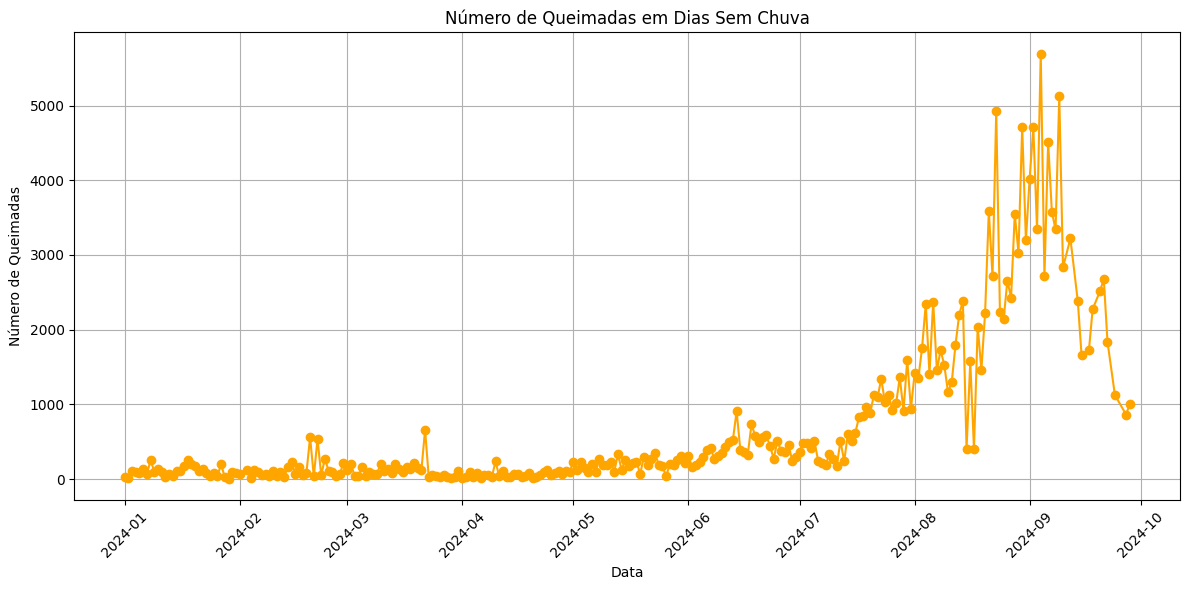

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def load_data(file_path):
    df = pd.read_csv(file_path)
    df.columns = df.columns.str.strip()
    df['DataHora'] = pd.to_datetime(df['DataHora'])
    return df

def count_burns_on_dry_days(df):
    df['Dia'] = df['DataHora'].dt.date
    return df[df['DiaSemChuva'] > 0].groupby('Dia').size()

def analyze_burns_with_numpy(burns_on_dry_days):
    burns_array = burns_on_dry_days.values
    soma_queimadas = np.sum(burns_array)
    media_queimadas = np.mean(burns_array)
    desvio_padrao_queimadas = np.std(burns_array)
    print(f"Somatório de Queimadas: {soma_queimadas}")
    print(f"Média de Queimadas por Dia Seco: {media_queimadas}")
    print(f"Desvio Padrão das Queimadas por Dia Seco: {desvio_padrao_queimadas}")

def plot_burns_on_dry_days(burns_on_dry_days):
    plt.figure(figsize=(12, 6))
    plt.plot(burns_on_dry_days.index, burns_on_dry_days.values, marker='o', color='orange')
    plt.title('Número de Queimadas em Dias Sem Chuva')
    plt.xlabel('Data')
    plt.ylabel('Número de Queimadas')
    plt.xticks(rotation=45)
    plt.grid()
    plt.tight_layout()
    plt.show()

file_path = 'data/focos_qmd_inpe_2024-01-01_2024-10-04_11.250079.csv'

if __name__ == "__main__":
    df = load_data(file_path)
    burns_on_dry_days = count_burns_on_dry_days(df)
    analyze_burns_with_numpy(burns_on_dry_days)
    plot_burns_on_dry_days(burns_on_dry_days)


Somatório de Queimadas: 214856
Média de Queimadas por Mês: 21485.6
Desvio Padrão das Queimadas por Mês: 27944.68937454843


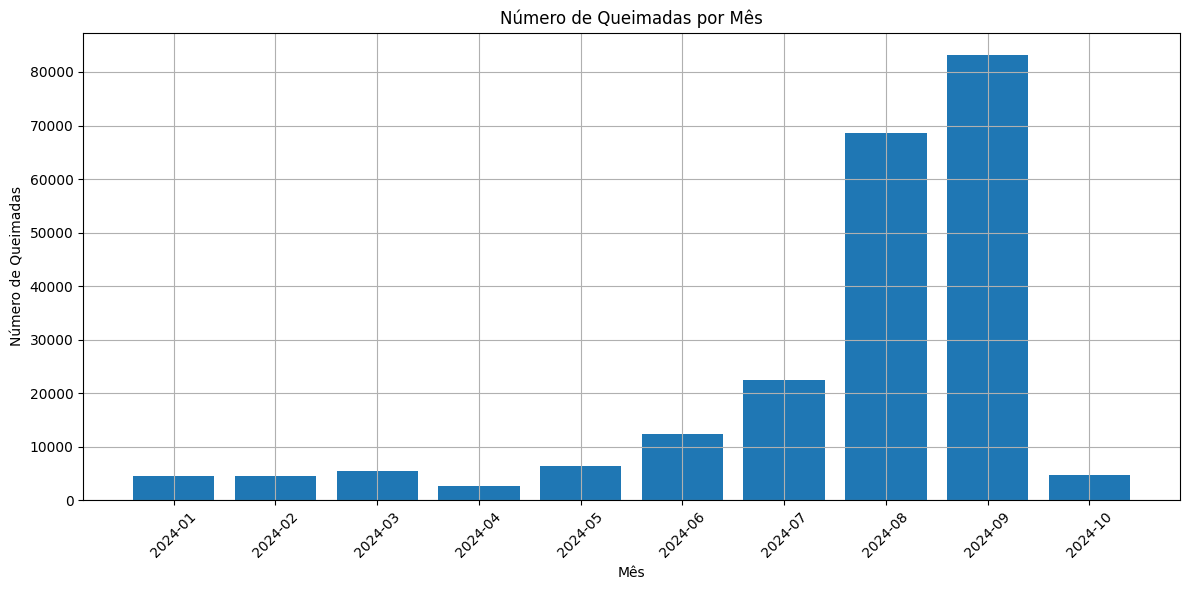

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from typing import Any

def load_data(file_path: str) -> pd.DataFrame:
    df = pd.read_csv(file_path)
    df.columns = df.columns.str.strip()
    df['DataHora'] = pd.to_datetime(df['DataHora'])
    return df

def count_burns_by_month(df: pd.DataFrame) -> pd.Series:
    df['Mes'] = df['DataHora'].dt.to_period('M')
    return df.groupby('Mes').size()

def analyze_burns_with_numpy(burns_by_month: pd.Series) -> None:
    burns_array = burns_by_month.values
    soma_queimadas = np.sum(burns_array)
    media_queimadas = np.mean(burns_array)
    desvio_padrao_queimadas = np.std(burns_array)
    
    print(f"Somatório de Queimadas: {soma_queimadas}")
    print(f"Média de Queimadas por Mês: {media_queimadas}")
    print(f"Desvio Padrão das Queimadas por Mês: {desvio_padrao_queimadas}")

def plot_burns_by_month(burns_by_month: pd.Series) -> None:
    plt.figure(figsize=(12, 6))
    plt.bar(burns_by_month.index.astype(str), burns_by_month.values)
    plt.title('Número de Queimadas por Mês')
    plt.xlabel('Mês')
    plt.ylabel('Número de Queimadas')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    file_path = 'data/focos_qmd_inpe_2024-01-01_2024-10-04_11.250079.csv'
    df = load_data(file_path)
    burns_by_month = count_burns_by_month(df)
    analyze_burns_with_numpy(burns_by_month)
    plot_burns_by_month(burns_by_month)


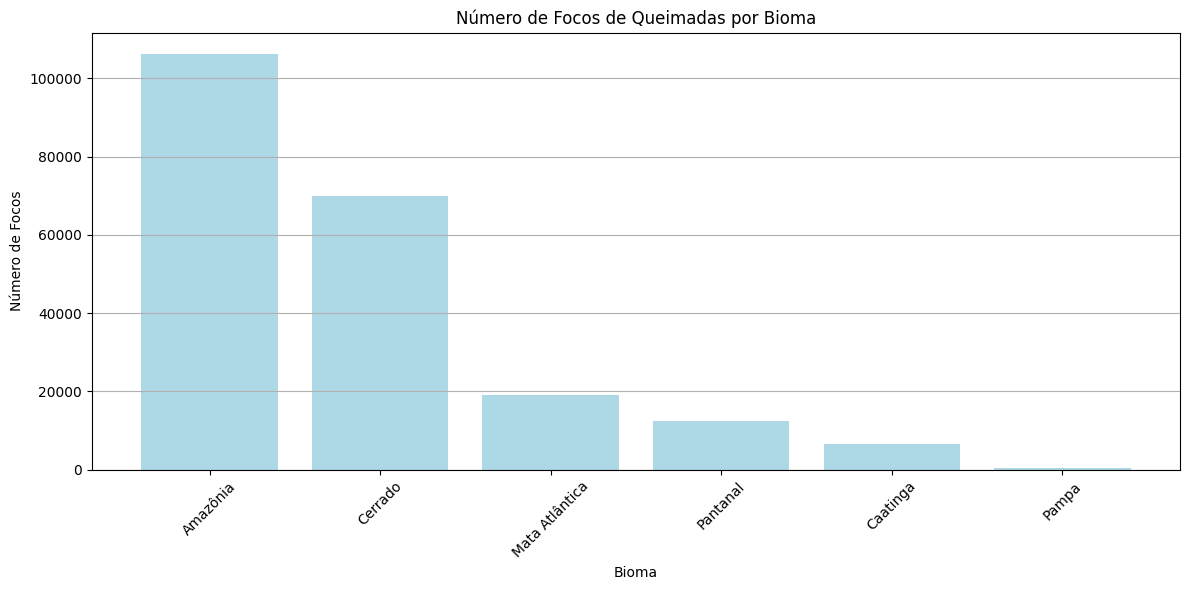

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('data/focos_qmd_inpe_2024-01-01_2024-10-04_11.250079.csv')
df.columns = df.columns.str.strip()
df['DataHora'] = pd.to_datetime(df['DataHora'])

focos_por_bioma = df['Bioma'].value_counts()

plt.figure(figsize=(12, 6))
plt.bar(focos_por_bioma.index, focos_por_bioma.values, color='lightblue')

plt.title('Número de Focos de Queimadas por Bioma')
plt.xlabel('Bioma')
plt.ylabel('Número de Focos')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


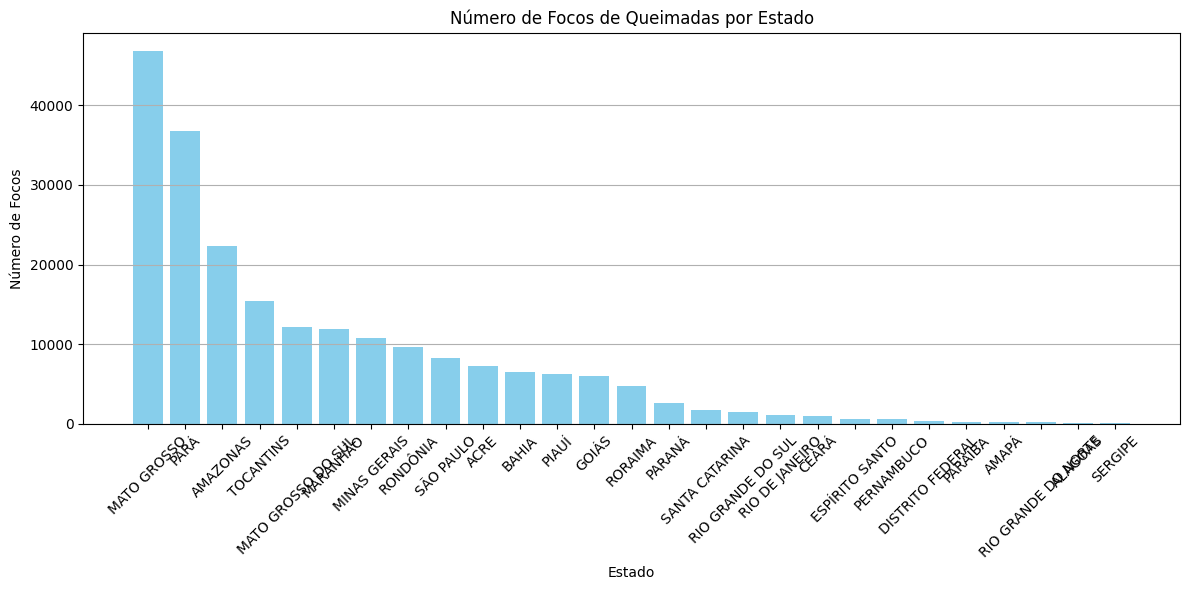

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def load_data(file_path: str) -> pd.DataFrame:
    df = pd.read_csv(file_path)
    df.columns = df.columns.str.strip()
    df['DataHora'] = pd.to_datetime(df['DataHora'])
    return df

def count_burns_by_state(df: pd.DataFrame) -> pd.Series:
    return df['Estado'].value_counts()

def plot_burns_by_state(burns_by_state: pd.Series) -> None:
    plt.figure(figsize=(12, 6))
    plt.bar(burns_by_state.index, burns_by_state.values, color='skyblue')
    
    plt.title('Número de Focos de Queimadas por Estado')
    plt.xlabel('Estado')
    plt.ylabel('Número de Focos')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

file_path = 'data/focos_qmd_inpe_2024-01-01_2024-10-04_11.250079.csv'

if __name__ == "__main__":
    df = load_data(file_path)
    burns_by_state = count_burns_by_state(df)
    plot_burns_by_state(burns_by_state)


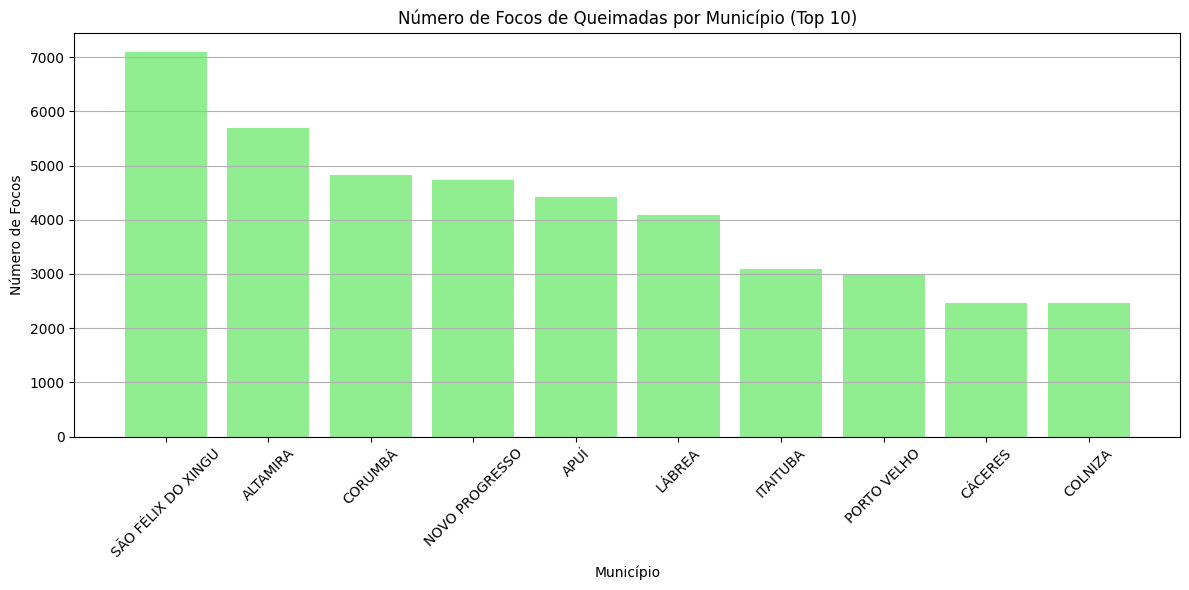

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def load_data(file_path: str) -> pd.DataFrame:
    df = pd.read_csv(file_path)
    df.columns = df.columns.str.strip()
    df['DataHora'] = pd.to_datetime(df['DataHora'])
    return df

def count_burns_by_municipality(df: pd.DataFrame) -> pd.Series:
    return df['Municipio'].value_counts()

def plot_burns_by_municipality(burns_by_municipality: pd.Series) -> None:
    top_burns = burns_by_municipality.head(10)
    
    plt.figure(figsize=(12, 6))
    plt.bar(top_burns.index, top_burns.values, color='lightgreen')
    
    plt.title('Número de Focos de Queimadas por Município (Top 10)')
    plt.xlabel('Município')
    plt.ylabel('Número de Focos')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

file_path = 'data/focos_qmd_inpe_2024-01-01_2024-10-04_11.250079.csv'

if __name__ == "__main__":
    df = load_data(file_path)
    burns_by_municipality = count_burns_by_municipality(df)
    plot_burns_by_municipality(burns_by_municipality)


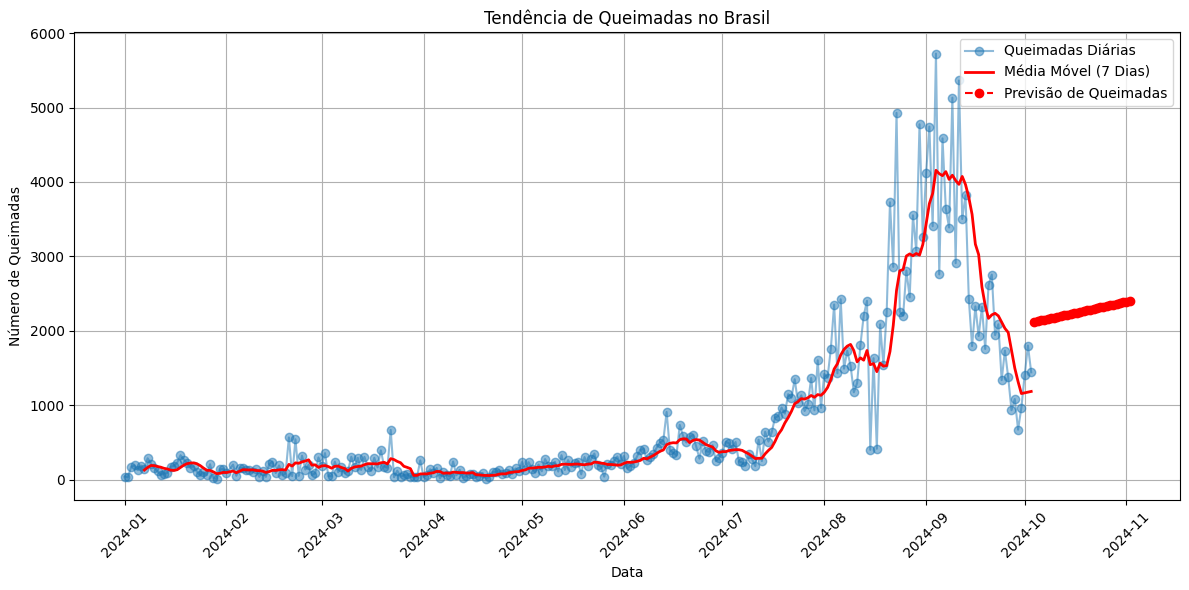

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def load_data(file_path: str) -> pd.DataFrame:
    df = pd.read_csv(file_path)
    df.columns = df.columns.str.strip()
    df['DataHora'] = pd.to_datetime(df['DataHora'])
    return df

def calculate_daily_burns(df: pd.DataFrame) -> (pd.Series, pd.Series):
    df['Dia'] = df['DataHora'].dt.date
    daily_burns = df.groupby('Dia').size()
    moving_average = daily_burns.rolling(window=7).mean()
    return daily_burns, moving_average

def predict_future_burns(daily_burns: pd.Series, future_days: int) -> np.ndarray:
    X = np.arange(len(daily_burns)).reshape(-1, 1)
    y = daily_burns.values.reshape(-1, 1)

    model = LinearRegression()
    model.fit(X, y)

    X_future = np.arange(len(daily_burns), len(daily_burns) + future_days).reshape(-1, 1)
    return model.predict(X_future)

def generate_future_dates(daily_burns: pd.Series, future_days: int) -> pd.DatetimeIndex:
    last_date = daily_burns.index[-1]
    return pd.date_range(start=last_date + pd.Timedelta(days=1), periods=future_days)

def plot_burn_trends(daily_burns: pd.Series, moving_average: pd.Series, y_future: np.ndarray, future_dates: pd.DatetimeIndex) -> None:
    plt.figure(figsize=(12, 6))
    plt.plot(daily_burns.index, daily_burns.values, label='Queimadas Diárias', marker='o', alpha=0.5)
    plt.plot(moving_average.index, moving_average.values, label='Média Móvel (7 Dias)', color='red', linewidth=2)
    plt.plot(future_dates, y_future, label='Previsão de Queimadas', color='red', linestyle='--', marker='o')

    plt.title('Tendência de Queimadas no Brasil')
    plt.xlabel('Data')
    plt.ylabel('Número de Queimadas')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

file_path = 'data/focos_qmd_inpe_2024-01-01_2024-10-04_11.250079.csv'

if __name__ == "__main__":
    df = load_data(file_path)
    daily_burns, moving_average = calculate_daily_burns(df)
    future_days = 30
    y_future = predict_future_burns(daily_burns, future_days)
    future_dates = generate_future_dates(daily_burns, future_days)
    plot_burn_trends(daily_burns, moving_average, y_future, future_dates)


/tmp/ipykernel_1310011/1959493467.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Bioma', y='FRP', data=frp_por_bioma, palette='viridis')


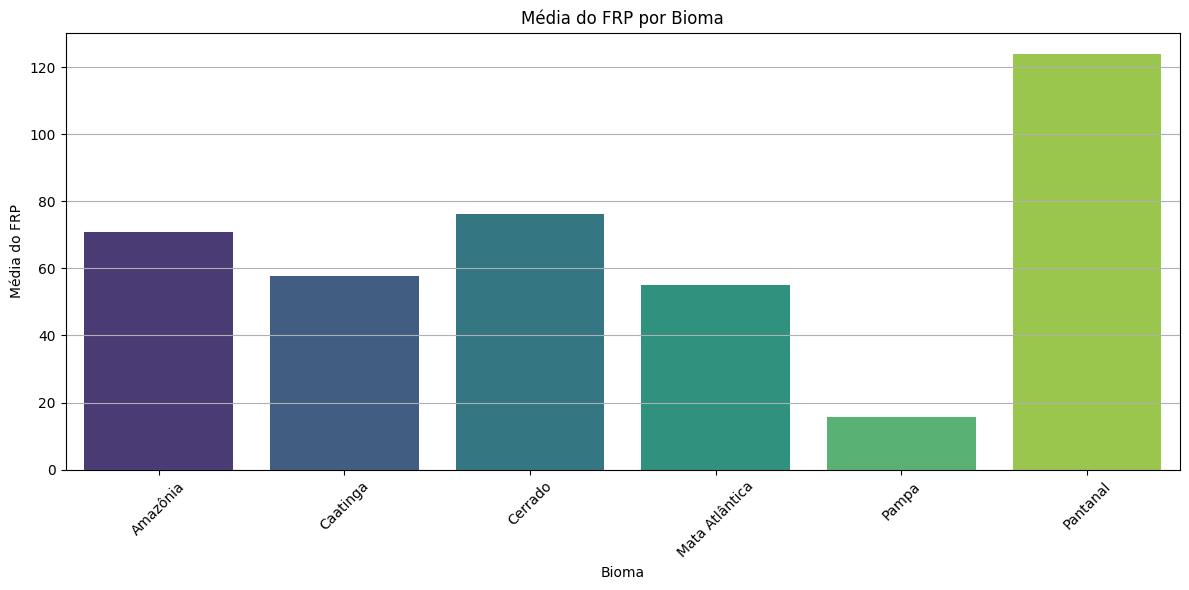

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def load_data(file_path: str) -> pd.DataFrame:
    df = pd.read_csv(file_path)
    df.columns = df.columns.str.strip()
    df['DataHora'] = pd.to_datetime(df['DataHora'])
    return df

def calculate_mean_frp_by_biome(df: pd.DataFrame) -> pd.DataFrame:
    frp_por_bioma = df.groupby('Bioma')['FRP'].mean().reset_index()
    frp_por_bioma['FRP'] = np.round(frp_por_bioma['FRP'], 2)
    return frp_por_bioma

def plot_mean_frp_by_biome(frp_por_bioma: pd.DataFrame) -> None:
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Bioma', y='FRP', data=frp_por_bioma, palette='viridis')
    plt.title('Média do FRP por Bioma')
    plt.xlabel('Bioma')
    plt.ylabel('Média do FRP')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

file_path = 'data/focos_qmd_inpe_2024-01-01_2024-10-04_11.250079.csv'

if __name__ == "__main__":
    df = load_data(file_path)
    frp_por_bioma = calculate_mean_frp_by_biome(df)
    plot_mean_frp_by_biome(frp_por_bioma)
